In [1]:
import data_preprocess_functions as dp_f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.utils import shuffle

from tensorflow.keras.utils import to_categorical

from tensorflow.keras import Model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import math

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
Dir='/nfs/kloe/einstein4/martino/'
mode='FixedCone'
path=Dir+'PKL/Zprime'+mode+'/'
dumper_path=path

In [3]:
data_singleBJet=pd.read_csv(path+'singleBJet_df.csv')
data_singleBTrk=pd.read_csv(path+'singleBTrk_df.csv')
#data_lightJet=pd.read_csv(path+'lightJet_df_m3.csv')
#data_lightTrk=pd.read_csv(path+'lightTrk_df_m3.csv')

data_singleBJet_02=pd.read_csv(path+'singleBJet_0.2_df.csv')
data_singleBTrk_02=pd.read_csv(path+'singleBTrk_0.2_df.csv')

In [4]:
data_singleBTrk.columns

Index(['pT', 'Eta', 'Deta', 'Theta', 'Phi', 'Dphi', 'E', 'DR', 'pTfrac',
       'pZfrac', 'p3fracJetE', 'incl_origin', 'excl_origin', 'isfromBD',
       'isfromBoutDR', 'isfromtau', 'closestJetDR', 'closestJetDeta',
       'closestJetDphi', 'closestJetDRtrkjet', 'trk_d0', 'trk_z0SinTheta'],
      dtype='object')

In [35]:
data_singleBTrk_02.query('isfromtau==0 and isfromBoutDR==0').shape[0],data_singleBTrk.shape[0]

(2068863, 2155800)

In [36]:
print(data_singleBTrk.shape[0]/data_singleBJet.shape[0])

print(data_singleBTrk.query('isfromBD==1').shape[0]/data_singleBTrk.shape[0])
print(data_singleBTrk.query('isfromBD==0').shape[0]/data_singleBTrk.shape[0])

30.459047430662505
0.13222979868262363
0.8677702013173764


In [37]:
cut='isfromBoutDR==0 and isfromtau==0'
cut2='abs(trk_d0)<1. and abs(trk_z0SinTheta)<1.5'
#scut='isfromBoutDR==1 or isfromtau==1'
den=False
alp=1.
#directory='./plot_confronto2/'

In [38]:
print(data_singleBTrk.query(cut2).shape[0]/data_singleBJet.shape[0])

print(data_singleBTrk.query(cut2).query('isfromBD==1').shape[0]/data_singleBTrk.query(cut2).shape[0])
print(data_singleBTrk.query(cut2).query('isfromBD==0').shape[0]/data_singleBTrk.query(cut2).shape[0])

13.071718213543948
0.25502039069280796
0.744979609307192


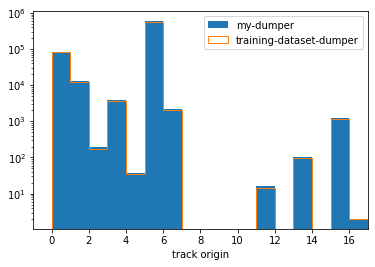

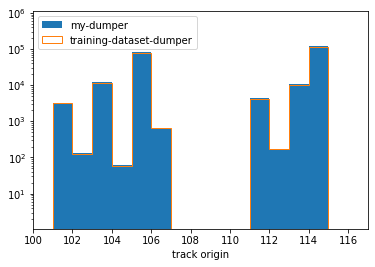

/afs/le.infn.it/user/c/centonze/miniconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


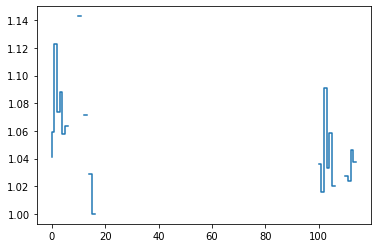

In [39]:
bin_range=range(0,int(max(data_singleBTrk['excl_origin'])))
#title_1='oneB_Jets_tracks'
#title_2='light_Jets_tracks'
#plt.title(title_1)
a1,b1,_=plt.hist(data_singleBTrk.query(cut2)['excl_origin'],bins=bin_range,histtype='bar',label='my-dumper',density=den,alpha=alp)
a2,b2,_=plt.hist(data_singleBTrk_02.query(cut2).query(cut)['excl_origin'],bins=bin_range,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track origin')
plt.xlim([-1,17])
plt.legend()
#plt.savefig(directory+title_1+'_trk_origin_1.pdf')
plt.show()

bin_range=range(0,int(max(data_singleBTrk['excl_origin'])))
#title_1='oneB_Jets_tracks'
#title_2='light_Jets_tracks'
#plt.title(title_1)
plt.hist(data_singleBTrk.query(cut2)['excl_origin'],bins=bin_range,histtype='bar',label='my-dumper',density=den,alpha=alp)
plt.hist(data_singleBTrk_02.query(cut2).query(cut)['excl_origin'],bins=bin_range,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track origin')
plt.xlim([100,117])
plt.legend()
#plt.savefig(directory+title_1+'_trk_origin_2.pdf')
plt.show()

plt.step(b1[:len(a1)],a1/a2)
plt.show()


/afs/le.infn.it/user/c/centonze/miniconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
/afs/le.infn.it/user/c/centonze/miniconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide
/afs/le.infn.it/user/c/centonze/miniconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: divide by zero encountered in true_divide
/afs/le.infn.it/user/c/centonze/miniconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 0, 'track z0')

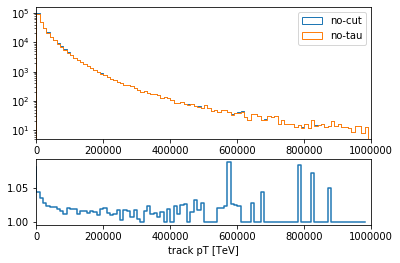

<Figure size 576x576 with 0 Axes>

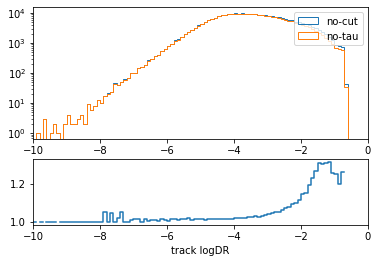

<Figure size 576x576 with 0 Axes>

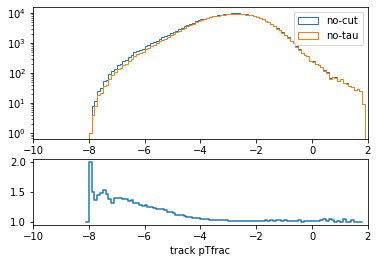

<Figure size 576x576 with 0 Axes>

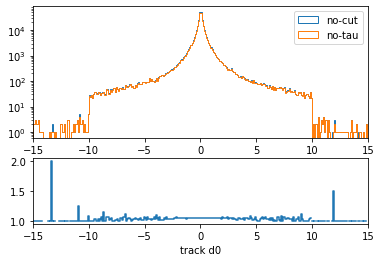

<Figure size 576x576 with 0 Axes>

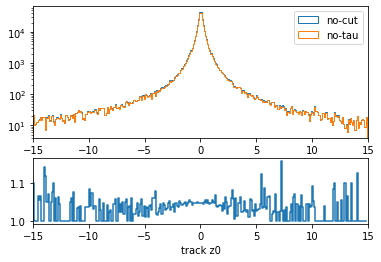

<Figure size 576x576 with 0 Axes>

In [41]:
x0,x1=0,int(1e6)
bin_range=np.arange(x0,x1,1e4)

fig = plt.figure()
plt.figure(figsize=(8,8))
#plt.suptitle('AntiKt4EMPFlowJets')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

h1=fig.add_subplot(gs[0])
a1,b1,_=h1.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['pT'],bins=bin_range,histtype='step',label='no-cut',density=den,alpha=alp)
a2,b2,_=h1.hist(data_singleBTrk_02.query(cut).query('isfromBD==1 and pT<1e6')['pT'],bins=bin_range,histtype='step',label='no-tau',density=den,alpha=alp)
h1.set_xlim(x0,x1)
h1.set_yscale('log')
h1.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
#plt.show()

st=fig.add_subplot(gs[1])
#plt.figure(figsize=(8,2))
st.step(b1[:len(a1)],a1/a2)
st.set_xlabel('track pT [TeV]')
st.set_xlim(x0,x1)
#plt.show()

x0,x1=-10,0
bin_range=np.arange(x0,x1,1e-1)
fig = plt.figure()
plt.figure(figsize=(8,8))
#plt.suptitle('AntiKt4EMPFlowJets')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

h1=fig.add_subplot(gs[0])
a1,b1,_=h1.hist(data_singleBTrk.query('isfromBD==1')['DR'].apply(lambda x: math.log(x)),bins=bin_range,histtype='step',label='no-cut',density=den,alpha=alp)
a2,b2,_=h1.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['DR'].apply(lambda x: math.log(x)),bins=bin_range,histtype='step',label='no-tau',density=den,alpha=alp)
h1.set_xlim(x0,x1)
h1.set_yscale('log')
h1.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
#plt.show()

st=fig.add_subplot(gs[1])
#plt.figure(figsize=(8,2))
st.step(b1[:len(a1)],a1/a2)
st.set_xlim(x0,x1)
st.set_xlabel('track logDR')
#plt.show()


x0,x1=-10,2
bin_range=np.arange(x0,x1,1e-1)
fig = plt.figure()
plt.figure(figsize=(8,8))
#plt.suptitle('AntiKt4EMPFlowJets')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

h1=fig.add_subplot(gs[0])
a1,b1,_=h1.hist(data_singleBTrk.query('isfromBD==1')['pTfrac'].apply(lambda x: math.log(x)),bins=bin_range,histtype='step',label='no-cut',density=den,alpha=alp)
a2,b2,_=h1.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['pTfrac'].apply(lambda x: math.log(x)),bins=bin_range,histtype='step',label='no-tau',density=den,alpha=alp)
h1.set_xlim(x0,x1)
h1.set_yscale('log')
h1.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
#plt.show()

st=fig.add_subplot(gs[1])
#plt.figure(figsize=(8,2))
st.step(b1[:len(a1)],a1/a2)
st.set_xlim(x0,x1)
st.set_xlabel('track pTfrac')
#plt.show()

x0,x1=-15,15
bin_range=np.arange(x0,x1,1e-1)
fig = plt.figure()
plt.figure(figsize=(8,8))
#plt.suptitle('AntiKt4EMPFlowJets')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

h1=fig.add_subplot(gs[0])
a1,b1,_=h1.hist(data_singleBTrk.query('isfromBD==1')['trk_d0'],bins=bin_range,histtype='step',label='no-cut',density=den,alpha=alp)
a2,b2,_=h1.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['trk_d0'],bins=bin_range,histtype='step',label='no-tau',density=den,alpha=alp)
h1.set_xlim(x0,x1)
h1.set_yscale('log')
h1.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
#plt.show()

st=fig.add_subplot(gs[1])
#plt.figure(figsize=(8,2))
st.step(b1[:len(a1)],a1/a2)
st.set_xlim(x0,x1)
st.set_xlabel('track d0')
#plt.show()

x0,x1=-15,15
bin_range=np.arange(x0,x1,1e-1)
fig = plt.figure()
plt.figure(figsize=(8,8))
#plt.suptitle('AntiKt4EMPFlowJets')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

h1=fig.add_subplot(gs[0])
a1,b1,_=h1.hist(data_singleBTrk.query('isfromBD==1')['trk_z0SinTheta'],bins=bin_range,histtype='step',label='no-cut',density=den,alpha=alp)
a2,b2,_=h1.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['trk_z0SinTheta'],bins=bin_range,histtype='step',label='no-tau',density=den,alpha=alp)
h1.set_xlim(x0,x1)
h1.set_yscale('log')
h1.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
#plt.show()

st=fig.add_subplot(gs[1])
#plt.figure(figsize=(8,2))
st.step(b1[:len(a1)],a1/a2)
st.set_xlim(x0,x1)
st.set_xlabel('track z0')
#plt.show()



In [42]:
data_singleBTrk.columns

Index(['pT', 'Eta', 'Deta', 'Theta', 'Phi', 'Dphi', 'E', 'DR', 'pTfrac',
       'pZfrac', 'p3fracJetE', 'incl_origin', 'excl_origin', 'isfromBD',
       'isfromBoutDR', 'isfromtau', 'closestJetDR', 'closestJetDeta',
       'closestJetDphi', 'closestJetDRtrkjet', 'trk_d0', 'trk_z0SinTheta'],
      dtype='object')

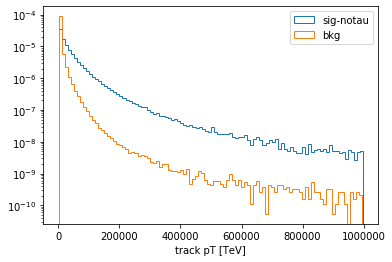

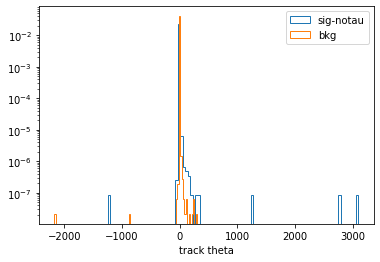

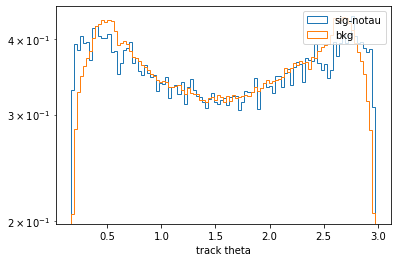

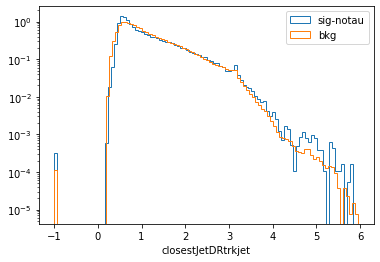

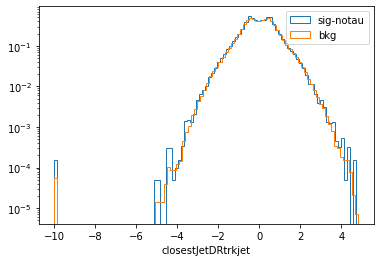

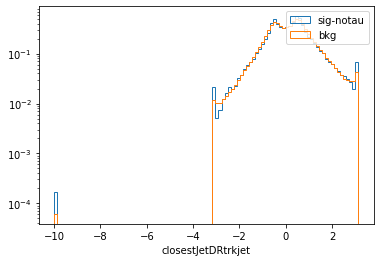

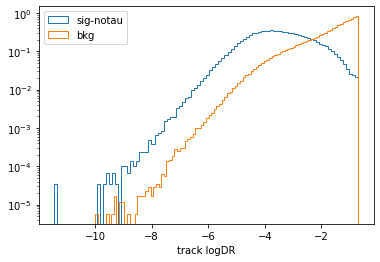

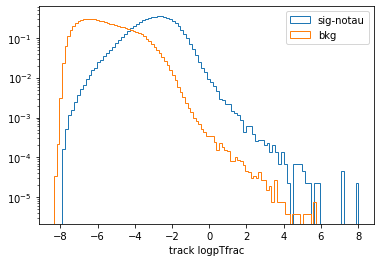

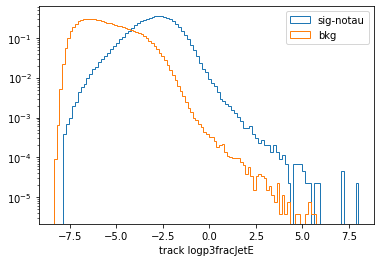

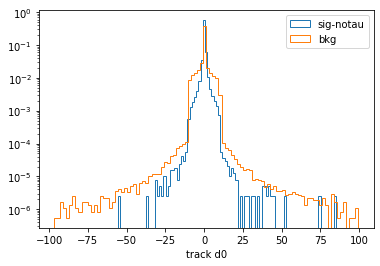

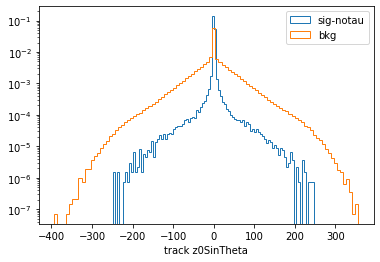

In [43]:
alp=1.
den=True

#bin_range=range(0,int(1e2))
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1 and pT<1e6')['pT'],bins=100,histtype='step',label='sig-notau',density=den,alpha=alp)
plt.hist(data_singleBTrk.query('isfromBD==0 and pT<1e6')['pT'],bins=100,histtype='step',label='bkg',density=den,alpha=alp)
#plt.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['pT'],bins=100,histtype='step',label='sig_notau',density=den,alpha=alp)
#plt.hist(data_lightTrk.query('isfromBD==0 and pT<1e6')['pT'],bins=100,histtype='step',label='bkg_light',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track pT [TeV]')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

#bin_range=range(0,int(1e2))
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['pZfrac'],bins=100,histtype='step',label='sig-notau',density=den,alpha=alp)
plt.hist(data_singleBTrk.query('isfromBD==0')['pZfrac'],bins=100,histtype='step',label='bkg',density=den,alpha=alp)
#plt.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['pT'],bins=100,histtype='step',label='sig_notau',density=den,alpha=alp)
#plt.hist(data_lightTrk.query('isfromBD==0 and pT<1e6')['pT'],bins=100,histtype='step',label='bkg_light',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track theta')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

#bin_range=range(0,int(1e2))
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['Theta'],bins=100,histtype='step',label='sig-notau',density=den,alpha=alp)
plt.hist(data_singleBTrk.query('isfromBD==0')['Theta'],bins=100,histtype='step',label='bkg',density=den,alpha=alp)
#plt.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['pT'],bins=100,histtype='step',label='sig_notau',density=den,alpha=alp)
#plt.hist(data_lightTrk.query('isfromBD==0 and pT<1e6')['pT'],bins=100,histtype='step',label='bkg_light',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track theta')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

#bin_range=range(0,int(1e2))
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['closestJetDRtrkjet'],bins=100,histtype='step',label='sig-notau',density=den,alpha=alp)
plt.hist(data_singleBTrk.query('isfromBD==0')['closestJetDRtrkjet'],bins=100,histtype='step',label='bkg',density=den,alpha=alp)
#plt.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['pT'],bins=100,histtype='step',label='sig_notau',density=den,alpha=alp)
#plt.hist(data_lightTrk.query('isfromBD==0 and pT<1e6')['pT'],bins=100,histtype='step',label='bkg_light',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('closestJetDRtrkjet')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

#bin_range=range(0,int(1e2))
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['closestJetDeta'],bins=100,histtype='step',label='sig-notau',density=den,alpha=alp)
plt.hist(data_singleBTrk.query('isfromBD==0')['closestJetDeta'],bins=100,histtype='step',label='bkg',density=den,alpha=alp)
#plt.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['pT'],bins=100,histtype='step',label='sig_notau',density=den,alpha=alp)
#plt.hist(data_lightTrk.query('isfromBD==0 and pT<1e6')['pT'],bins=100,histtype='step',label='bkg_light',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('closestJetDRtrkjet')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

#bin_range=range(0,int(1e2))
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['closestJetDphi'],bins=100,histtype='step',label='sig-notau',density=den,alpha=alp)
plt.hist(data_singleBTrk.query('isfromBD==0')['closestJetDphi'],bins=100,histtype='step',label='bkg',density=den,alpha=alp)
#plt.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['pT'],bins=100,histtype='step',label='sig_notau',density=den,alpha=alp)
#plt.hist(data_lightTrk.query('isfromBD==0 and pT<1e6')['pT'],bins=100,histtype='step',label='bkg_light',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('closestJetDRtrkjet')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['DR'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='sig-notau',density=den,alpha=alp)
plt.hist(data_singleBTrk.query('isfromBD==0')['DR'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='bkg',density=den,alpha=alp)
#plt.hist(data_singleBTrk.query('isfromBD==1')['DR'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='sig_notau',density=den,alpha=alp)
#plt.hist(data_lightTrk.query('isfromBD==0')['DR'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='bkg_light',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track logDR')
plt.legend(loc = 'upper left')
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['pTfrac'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='sig-notau',density=den,alpha=alp)
plt.hist(data_singleBTrk.query('isfromBD==0')['pTfrac'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='bkg',density=den,alpha=alp)
#plt.hist(data_singleBTrk.query('isfromBD==1')['pTfrac'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='sig_notau',density=den,alpha=alp)
#plt.hist(data_lightTrk.query('isfromBD==0')['pTfrac'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='bkg_light',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track logpTfrac')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

#bin_range=range(0,int(1e2))
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['p3fracJetE'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='sig-notau',density=den,alpha=alp)
plt.hist(data_singleBTrk.query('isfromBD==0')['p3fracJetE'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='bkg',density=den,alpha=alp)
#plt.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['pT'],bins=100,histtype='step',label='sig_notau',density=den,alpha=alp)
#plt.hist(data_lightTrk.query('isfromBD==0 and pT<1e6')['pT'],bins=100,histtype='step',label='bkg_light',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track logp3fracJetE')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['trk_d0'],bins=100,histtype='step',label='sig-notau',density=den,alpha=alp)
plt.hist(data_singleBTrk.query('isfromBD==0')['trk_d0'],bins=100,histtype='step',label='bkg',density=den,alpha=alp)
#plt.hist(data_singleBTrk.query(cut).query('isfromBD==1')['trk_d0'],bins=100,histtype='step',label='sig_notau',density=den,alpha=alp)
#plt.hist(data_lightTrk.query('isfromBD==0')['trk_d0'],bins=100,histtype='step',label='bkg_light',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track d0')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['trk_z0SinTheta'],bins=100,histtype='step',label='sig-notau',density=den,alpha=alp)
plt.hist(data_singleBTrk.query('isfromBD==0')['trk_z0SinTheta'],bins=100,histtype='step',label='bkg',density=den,alpha=alp)
#plt.hist(data_singleBTrk.query(cut).query('isfromBD==1')['trk_z0SinTheta'],bins=100,histtype='step',label='sig_notau',density=den,alpha=alp)
#plt.hist(data_lightTrk.query('isfromBD==0')['trk_z0SinTheta'],bins=100,histtype='step',label='bkg_light',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track z0SinTheta')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

In [22]:
data_singleBTrk.columns

Index(['pT', 'Eta', 'Deta', 'Theta', 'Phi', 'Dphi', 'E', 'DR', 'pTfrac',
       'pZfrac', 'p3fracJetE', 'incl_origin', 'excl_origin', 'isfromBD',
       'isfromBoutDR', 'isfromtau', 'closestJetDR', 'closestJetDeta',
       'closestJetDphi', 'closestJetDRtrkjet', 'trk_d0', 'trk_z0SinTheta'],
      dtype='object')

30


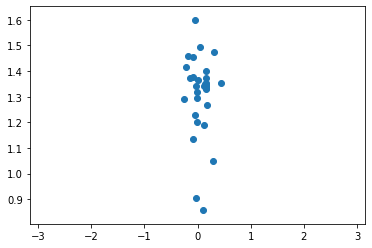

In [6]:
j=1
jet_idx=np.where(data_singleBTrk['closestJetDR']==data_singleBTrk['closestJetDR'][j])
print(jet_idx[0][-1])
plt.scatter(data_singleBTrk.iloc[jet_idx]['Eta'],data_singleBTrk.iloc[jet_idx]['Phi'])
plt.xlim([-2.5,2.5])
plt.xlim([-3.15,3.15])
plt.show()

30


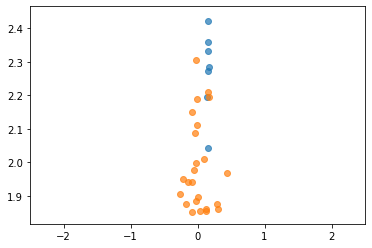

In [7]:
j=1
jet_idx=np.where(data_singleBTrk['closestJetDR']==data_singleBTrk['closestJetDR'][j])
print(jet_idx[0][-1])
plt.scatter(data_singleBTrk.iloc[jet_idx].query('isfromBD==1')['Eta'],data_singleBTrk.iloc[jet_idx].query('isfromBD==1')['pT'].apply(lambda x: math.log(x)).apply(lambda x: math.log(x)),alpha=0.7)
plt.scatter(data_singleBTrk.iloc[jet_idx].query('isfromBD==0')['Eta'],data_singleBTrk.iloc[jet_idx].query('isfromBD==0')['pT'].apply(lambda x: math.log(x)).apply(lambda x: math.log(x)),alpha=0.7)
plt.xlim([-2.5,2.5])
#plt.ylim([-3.15,3.15])
#plt.ylim([6.214608098422191,14])
plt.show()

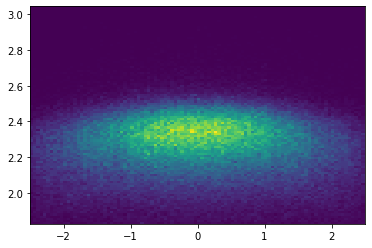

In [55]:
#jet_idx=np.where(data_singleBTrk['closestJetDR']==data_singleBTrk['closestJetDR'][1])
#print(jet_idx[0][-1])
plt.hist2d(data_singleBTrk.query('isfromBD==1')['Eta'],data_singleBTrk.query('isfromBD==1')['pT'].apply(lambda x: math.log(x)).apply(lambda x: math.log(x)),bins=(100,100))
plt.xlim([-2.5,2.5])
#plt.ylim([-3.15,3.15])
#plt.ylim([6.214608098422191,14])
plt.show()

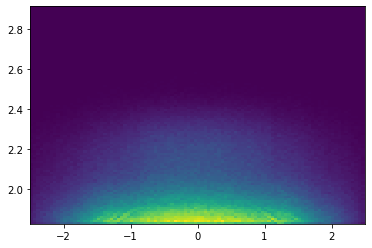

In [53]:
plt.hist2d(data_singleBTrk.query('isfromBD==0')['Eta'],data_singleBTrk.query('isfromBD==0')['pT'].apply(lambda x: math.log(x)).apply(lambda x: math.log(x)),bins=(100,100))
plt.xlim([-2.5,2.5])
#plt.ylim([-3.15,3.15])
#plt.ylim([6.214608098422191,14])
plt.show()

In [63]:
math.log(500)

6.214608098422191

In [61]:
math.log(math.pi)

1.1447298858494002